# Netflix Movie Data Analysis
Created by: Ricky Jay Gomez

![Movie popcorn on red background](redpopcorn.jpg)

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, **it is believed that the average duration of movies has been declining**. Using the initial research done, this work delves into the Netflix data to see if  movie lengths are actually getting shorter and explain some of the contributing factors, if any.

The dataset is `netflix_data.csv` with the following table detailing the column names and descriptions:

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

## Importing Data

In [45]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

## Loading Data

In [46]:
netflix_df = pd.read_csv("netflix_data.csv",index_col = 0)
netflix_df.head()

,type,title,director,cast,country,date_added,release_year,duration,description,genre
show_id,,,,,,,,,,
s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


## Exploratory Data Analysis

In [47]:
# Subsetting Netflix data to only 'movies' type: netflix_subset

netflix_subset = netflix_df[netflix_df['type'] == 'Movie']
netflix_subset.head()


,type,title,director,cast,country,date_added,release_year,duration,description,genre
show_id,,,,,,,,,,
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies


In [48]:
# Create dataframe with specific columns only: netflix_movies

netflix_movies = netflix_subset[['title','country','genre','release_year','duration']]
netflix_movies.head()

,title,country,genre,release_year,duration
show_id,,,,,
s2,7:19,Mexico,Dramas,2016,93
s3,23:59,Singapore,Horror Movies,2011,78
s4,9,United States,Action,2009,80
s5,21,United States,Dramas,2008,123
s7,122,Egypt,Horror Movies,2019,95


In [49]:
# Check movies with duration less than 60 minutes: short_movies

short_movies = netflix_movies[netflix_movies['duration'] < 60]
short_movies.head()

,title,country,genre,release_year,duration
show_id,,,,,
s36,#Rucker50,United States,Documentaries,2016,56
s56,100 Things to do Before High School,United States,Uncategorized,2014,44
s68,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
s102,3 Seconds Divorce,Canada,Documentaries,2018,53
s147,A 3 Minute Hug,Mexico,Documentaries,2019,28


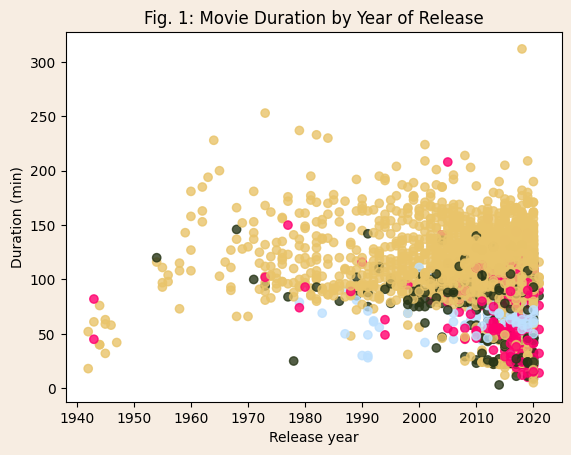

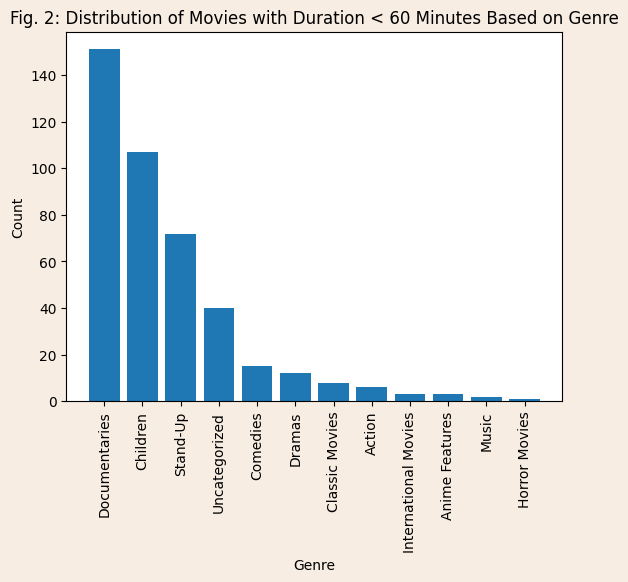

In [50]:
# Data visualization

colors = []
for lab, row in netflix_movies.iterrows() :
    # print(row)
    if row['genre'] == 'Children' :
        colors.append('#283618')
    elif row['genre'] == 'Documentaries' :
        colors.append('#ff006e')
    elif row['genre'] == 'Stand-Up' :
        colors.append('#bde0fe')
    else :
        colors.append('#e9c46a')

fig1 = plt.figure()
fig1.set_facecolor('#f7ede2')

plt.scatter(netflix_movies['release_year'],netflix_movies['duration'],c = colors,alpha=0.8)
plt.xlabel('Release year')
plt.ylabel('Duration (min)')
plt.title('Fig. 1: Movie Duration by Year of Release')
plt.show()

fig2 = plt.figure()
fig2.set_facecolor('#f7ede2')

plt.bar(short_movies['genre'].value_counts().index,short_movies['genre'].value_counts().values)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Fig. 2: Distribution of Movies with Duration < 60 Minutes Based on Genre')
plt.xticks(rotation = 90)
plt.show()

## Question: Are we certain that movies are getting shorter?

### Answer: No. 

Based on Fig. 1, there is no observed shortening of the movie durations. Rather, there is just a wider range of variation on the length of movies in the recent years as the number of movies produced increase. 

Fig. 2 shows the number of movies produced with duration less than 60 minutes per genre. It appears that documentaries, children, and stand-up movie genres majorly contribute to the number of short movies released by Netflix; however, it is not apparent if movie durations are actually declining with release years.